## 機械学習スクラッチ　線形回帰

**Sprintの目的**

スクラッチを通して線形回帰を理解する

オブジェクト指向を意識した実装に慣れる

数式をコードに落とし込めるようにする

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
df = pd.read_csv("train.csv")

In [3]:
X = df.loc[: , ["GrLivArea" , "YearBuilt"]].values
y = df.loc[: , "SalePrice"].values

In [51]:
class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録

    """

    def __init__(self, num_iter, lr, bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        self.coef_ = coef_
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)

    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """

        if self.verbose == True:
            #verboseをTrueにした際は学習過程を出力
            print("")
        pass


    def predict(self, X):
        """
        線形回帰を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """

        pass
        return

## 【問題1】仮定関数


線形回帰の仮定関数を実装してください。

In [52]:
def _linear_hypothesis(X):
    """
    線形の仮定関数を計算する

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      学習データ

    Returns
    -------
      次の形のndarray, shape (n_samples, 1)
      線形の仮定関数による推定結果

    """
    one = np.ones(X.shape[0]).reshape(-1 , 1)
    X = np.concatenate([X , one] , axis = 1)
    #X = np.insert(X , 0 , 1, axis = 1)
    theta = np.random.rand(X.shape[1])
    #print(theta.shape)
    #print(X.shape)
    #print(one.shape)
    h = np.dot(theta , X.T)
    return h

In [53]:
_linear_hypothesis(X).shape

(1460,)

## 問題2】最急降下法

最急降下法により学習させる実装を行なってください。以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、fit
メソッドから呼び出すようにしてください。

In [54]:
def error(h , y):
    return h - y
error(_linear_hypothesis(X) , y)

array([-206413.30015087, -179852.28934865, -221340.24997998, ...,
       -263817.56261946, -140660.80886631, -145860.46632466])

In [55]:
def _gradient_descent(X , lr = 0.01 ):
    """
    説明を記述
    """
    theta = np.random.rand(X.shape[1])
    theta = theta - lr * np.dot(error( _linear_hypothesis(X) , y) , X ) / X.shape[0]
    return theta

In [56]:
_gradient_descent(X)

array([2997316.4746432 , 3528609.09741693])

## 【問題3】推定

推定する仕組みを実装してください。ScratchLinearRegressionクラスの雛形に含まれるpredictメソッドに書き加えてください。

仮定関数 
hθ(x)の出力が推定結果です。

In [57]:
def predict(X):
    y_pred = _linear_hypothesis(X)
    return y_pred

## 【問題4】平均二乗誤差

線形回帰の指標値として用いられる平均二乗誤差（mean square error, MSE）の関数を作成してください。

平均二乗誤差関数は回帰問題全般で使える関数のため、ScratchLinearRegressionクラスのメソッドではなく、別の関数として作成してください。雛形を用意してあります。

平均二乗誤差は以下の数式で表されます。

In [58]:
def MSE(y_pred, y):
    """
    平均二乗誤差の計算

    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
      推定した値
    y : 次の形のndarray, shape (n_samples,)
      正解値

    Returns
    ----------
    mse : numpy.float
      平均二乗誤差
    """
    mse = np.sum((y_pred - y)**2) / X.shape[0]
    
    return mse

In [59]:
y_pred = _linear_hypothesis(X)
MSE(y_pred , y)

38139930115.457306

## 【問題5】目的関数

以下の数式で表される線形回帰の 目的関数（損失関数） を実装してください。そして、これをself.loss, self.val_lossに記録するようにしてください。

In [60]:
j_theta = np.sum((y_pred - y)**2 )/ (2*X.shape[0])

In [61]:
def j_loss(self , X , y):
    return np.sum((y_pred - y)**2) / (2*X.shape[0])

In [62]:
j_theta

19069965057.728653

In [63]:
MSE(y_pred , y) / 2

19069965057.728653

In [75]:
class ScratchLinearRegression():
    
    def __init__(self , num_iter = 100, lr = 0.01 , bias = True, verbose = True):
        self.h = None
        self.theta = None
        
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        
        
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        
    def _linear_hypothesis(self , X):
        #self.one = np.ones(X.shape[0]).reshape(-1 , 1)
        #self.x = np.concatenate([X , self.one] , axis = 1)
        self.h = np.dot(self.theta , X.T)
        return self.h
    
    def _get_error(self , h , y):
        return self.h - y
    
    def _gradient_descent(self , X , error):
        self.theta = self.theta - self.lr * np.dot(self.error , X ) / X.shape[0]
        return self.theta
    
    def _get_j_loss(self , X , y):
        #print(self.theta)
        return np.sum((self.y_pred - y)**2) / (2*X.shape[0])
    
    def _get_MSE(self , y , y_pred):
        return  np.sum((self.y_pred - y)**2) / X.shape[0]
    
    def _get_predict(self, X):
        self.y_pred = self._linear_hypothesis(X)
        return self.y_pred
    
    #def _get_one(self.X):
        #if self.bias:
            #self.one = np.ones(X.shape[0]).reshape(-1 , 1)
            #X = np.concatenate([self.one , X] , axis = 1)
        #return X
    
    def fit(self , X , y , X_val=None, y_val=None):
        if self.bias:
            self.one = np.ones(X.shape[0]).reshape(-1 , 1)
            X = np.concatenate([X , self.one] , axis = 1)
            
            if X_val is not None:
                self.one = np.ones(X_val.shape[0]).reshape(-1 , 1)
                X_val = np.concatenate([X_val , self.one] , axis = 1)

        self.theta = np.random.rand(X.shape[1])

        for i in range(self.iter):
            self.h = self._linear_hypothesis(X)
            self.error = self._get_error(self.h ,y)
            self._gradient_descent( X , error)
            self.y_pred = self._get_predict(X)
            self.mse = self._get_MSE(y , self.y_pred)
            self.loss[i] = self.mse
            
            if X_val is not None:
                #self.h = self._linear_hypothesis(X)
                self.y_pred_val = self._get_predict(X_val)
                self.mse_val = self._get_MSE(y_val , self.y_pred_val )
                self.val_loss[i] = self.mse_val

            
        if self.verbose:
        #verboseをTrueにした際は学習過程を出力
            print(self.loss)
            
    def predict(self , X):
        if self.bias:
            self.one = np.ones(X.shape[0]).reshape(-1 , 1)
            X = np.concatenate([X , self.one] , axis = 1)
        return self._get_predict(X)

## 【問題6】学習と推定


In [76]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train ,y_test =  train_test_split(
               X , y , test_size = 0.25)

In [77]:
slr = ScratchLinearRegression(num_iter=10000, lr=0.000000001)

In [78]:
slr.fit(X_train , y_train , X_test , y_test)

[2.85469855e+10 2.82292154e+10 2.79154132e+10 ... 2.43795140e+09
 2.43794330e+09 2.43793521e+09]


In [79]:
#slr.loss

In [80]:
#slr.val_loss

## 【問題7】学習曲線のプロット


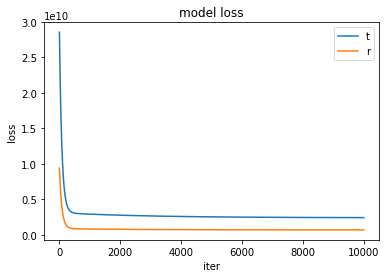

In [81]:
plt.plot(np.arange(1 , len(slr.loss) + 1) , slr.loss , label = "train_loss")
plt.plot(np.arange(1 , len(slr.val_loss) + 1) , slr.val_loss , label = "test_loss")
plt.title("model loss")
plt.xlabel("iter")
plt.ylabel("loss")
plt.legend("train_loss")
plt.show()

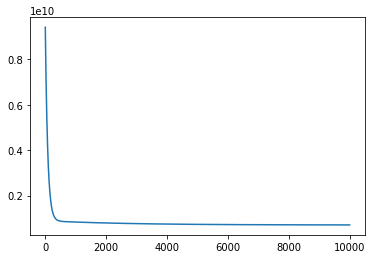

In [82]:
plt.plot(np.arange(1 , len(slr.val_loss) + 1) , slr.val_loss , label = "test_loss")
plt.show()

In [83]:
#np.arange(1 , len(slr.loss) + 1)

In [84]:
slr.predict(X_test)

array([288277.4810082 , 202313.80336037, 149634.86701574, 192460.23077284,
       168174.69228232, 216271.67006545, 225426.09423362, 140286.08999338,
       210294.97991127, 194185.11578578, 196570.16267931, 254872.50476246,
       187291.64840271, 240316.59371098, 260128.55316498, 132969.07544889,
       162217.42291756, 189948.87626807, 289460.36654021, 227840.48975118,
       180301.07707251, 166704.3500748 , 132949.65465946, 193291.46955229,
       113087.14316898, 198166.81249806, 333437.91946205, 123702.12666999,
       170328.7622456 , 169957.83966354, 181722.64986656,  98220.06460688,
       158043.30093403, 275166.41870609, 191446.20463688, 239042.24202075,
       112498.5917774 , 188592.84129431, 121404.25588899, 138403.91108207,
       195577.62987566, 278256.83164762, 142036.1785446 , 145563.48676827,
       199845.14560036, 186976.77068612, 238290.46902202, 178436.39136767,
       144619.57841815, 154958.81570128, 254186.84942375, 225501.84980838,
       200225.70609716, 1

In [85]:
X_test.shape

(365, 2)